In order to install Keras tuner which will tell no of hidden layers to choose and the number of neurons in each layer. the below conditions should be satisfied.

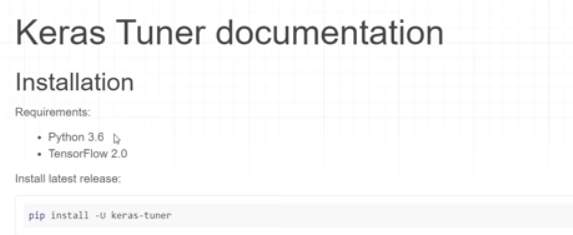

In [1]:
from platform import python_version

print(python_version())

3.6.12


In [2]:
import tensorflow
tensorflow.__version__

'2.4.0'

Even though my python version is higher my tensorflow versin is above 2.0. I will try with the ixisting environment if not will create a virtual env.

#### Keras Tuner- Decide Number of Hidden Layers And Neuron In Neural Network

In [3]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [4]:
df=pd.read_csv('./Data/17.5-Real_Combine.csv')

In [5]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

#### Hyperparameters
1. How many number of hidden layers we should have?
2. How many number of neurons we should have in hidden layers?
3. Learning Rate 

In [7]:
def build_model(hp):
    # we will have 2 methods 1. hp.int (where we have to try diff values) 2. hp.choice (choose one)
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)): # 2 to 20 hidden layers
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))  # 32 to 512 neurons in hidden layer
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error']) # learning rate 0.01, 0.001, 0.0001
    return model

In [8]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Air Quality Index')

INFO:tensorflow:Reloading Oracle from existing project project\Air Quality Index\oracle.json


In [9]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 15s]
val_mean_absolute_error: nan

Best val_mean_absolute_error So Far: nan
Total elapsed time: 00h 01m 06s
INFO:tensorflow:Oracle triggered exit


In [12]:
tuner.results_summary()

Results summary
Results in project\Air Quality Index
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 12
units_0: 448
units_1: 64
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
Score: nan
Trial summary
Hyperparameters:
num_layers: 18
units_0: 320
units_1: 64
learning_rate: 0.0001
units_2: 160
units_3: 416
units_4: 384
units_5: 96
units_6: 288
units_7: 32
units_8: 64
units_9: 96
units_10: 288
units_11: 224
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
Score: nan
Trial summary
Hyperparameters:
num_layers: 2
units_0: 288
units_1: 64
learning_rate: 0.001
units_2: 352
units_3: 32
units_4: 416
units_5: 192
units_6: 224
units_7: 416
units_8: 448
units_9: 224
units_10: 96
units_11: 256
units_12: 128
units_13: 512
units_14: 224
units_15: 320
units_16: 384
units_17: 416
Score: nan
Trial summary